# Sentiment Symposium - Build a Sentiment Predictor in 5 Minutes in Python

## Łukasz Augustyniak
### Piotr Bródka
e-Mail: <a href="mailto:lukasz.augustyniak@pwr.edu.pl">lukasz.augustyniak@pwr.edu.pl</a><br>
Twitter:  @<a href="https://twitter.com/luk_augustyniak">luk_augustyniak</a><br>
LinkedIn: <a href="https://pl.linkedin.com/in/lukaszaugustyniak">Łukasz Augustyniak</a><br>
GitHub: <a href="https://github.com/laugustyniak/sas2015">laugustyniak</a><br>
Ipython Notebook view: <a href="http://nbviewer.ipython.org/github/laugustyniak/sas2015/blob/master/sentiment-symposium-2015.ipynb">SAS2015 Notebook</a>

<img src="pwr.png"><br>
<div align="center"><a href="http://www.portal.pwr.edu.pl/index,242.dhtml">Wroclaw University of Technology</a></div>

## <div style="text-align: center"> European research centre of Network intelliGence for INnovation Enhancement</div>

<img src="engine.png"><br>

<div align="center"><a href="http://engine.pwr.wroc.pl/en/">ENGINE Centre</a></div>

## Purpose of the presentation:

- Learning by practice
- Real example implementation
- Using trained model for production

# Why Python?

- code <b>readability</b><br>
- its syntax allows programmers to express concepts in <b>fewer lines of code</b> than C++ or Java<br>
- really <b>strong open source community</b><br>
- ideal for fast prototyping and <b>building models</b> (research)<br>

# Why IPython Notebook?

<a href=""><b>The IPython Notebook</b></a> - is an interactive computational environment, in which you can combine code execution, rich text, mathematics, plots and rich media. Just like you see it now :) 

In [7]:
sas2015 = 'Welcome at Sentiment Symposium'

In [8]:
print sas2015

Welcome at Sentiment Symposium


In [9]:
sas2015 + ' 2015'

'Welcome at Sentiment Symposium 2015'

# How can I install Python and IPython Notebook?

## Python's distribution - Anaconda

Python interpreter with pre-installed libraries - <a href="http://continuum.io/downloads"><b>Anaconda</b></a> - is a completely free Python distribution (including for commercial use and redistribution). It includes over <b>195 of the most popular Python packages for science, math, engineering, data analysis</b>. 

# Python's libraries 

## Scikit-Learn & Pandas

<b><a href="http://scikit-learn.org/stable/">scikit-learn - Machine Learning in Python</a></b><br>
- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on <b>NumPy, SciPy, and matplotlib</b>
- <b>Open source</b>, commercially usable - BSD license
<br>

<b><a href="http://pandas.pydata.org/">pandas - Python Data Analysis Library</a></b><br>
- pandas is an open source, BSD-licensed library <b>providing high-performance, easy-to-use data structures and data analysis tools</b> for the Python programming language.<br>
- great for loading and transforming data

In [10]:
import pandas as pd

## Where is NTLK? 

Whole preprocessing and model creation is possible with <b>scikit-learn</b> library. 

<hr>
# Load dataset with Pandas 

##Path for dataset

In [11]:
from os import path
notebook_path = 'C:/Users/Dell/Documents/GitHub/Presentations/sas2015/'

### SemEval 2014 dataset - http://alt.qcri.org/semeval2014/ 
approximately 6 000 of tweets with annotation negative/neutral/positive

## Load data into Data Frame structure

<b>Tabular data structure with labeled axes (rows and columns)</b>. <br><br>

Arithmetic operations align on both row and column labels. The primary pandas data structure

### Lovely one liner for data loading :)

In [12]:
data = pd.read_csv(path.join(notebook_path, 'data', 'SemEval-2014.csv'), index_col=0)

In [13]:
data

,sentiment,document
0,3,Gas by my house hit $3.39!!!! I'm going to Cha...
1,1,"Theo Walcott is still shit, watch Rafa and Joh..."
2,1,"its not that I'm a GSP fan, i just hate Nick D..."
3,1,Iranian general says Israel's Iron Dome can't ...
4,3,with J Davlar 11th. Main rivals are team Polan...
5,1,"Talking about ACT's && SAT's, deciding where I..."
6,2,"Why is ""Happy Valentines Day"" trending? It's o..."
7,1,"They may have a SuperBowl in Dallas, but Dalla..."
8,2,Im bringing the monster load of candy tomorrow...
9,2,"Apple software, retail chiefs out in overhaul:..."


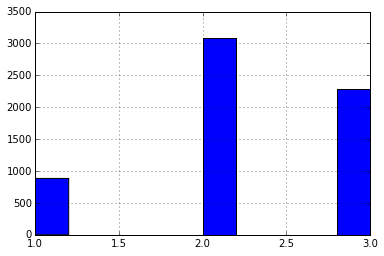

In [14]:
%matplotlib inline

data.sentiment.hist()

### Get documents and labels into more intutive names  

In [15]:
docs = data['document'] 
y = data['sentiment'] # standart name for labels/classes variable 

In [16]:
docs[0]

"Gas by my house hit $3.39!!!! I'm going to Chapel Hill on Sat. :)"

In [17]:
y[0]

3

<hr>
# Build Bag of Word model with Scikit-Learn

## Convert a collection of text documents to a matrix of token counts

'I like new Note IV.' -> [0, 1, 1, 1, 1, 0, 0]<br>
'I was dissapointed by new Samsung phone.' -> [1, 0, 0, 1, 0, 1, 1]

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(ngram_range=(1, 2), lowercase=True, stop_words='english')
X = count_vect.fit_transform(docs)

print '#features=%s for #documents=%s' % (X.shape[1], X.shape[0])

#features=74011 for #documents=6265


# Cross-Validation

### Good practice for research

<img src="cv.jpg">

In [19]:
from sklearn import metrics, cross_validation
from sklearn.linear_model import LogisticRegression

def sentiment_classification(X, y, n_folds=10, classifier=None):
        """
        Counting sentiment with cross validation - supervised method
        :type X: ndarray feature matrix for classification
        :type y: list or ndarray of classes
        :type n_folds: int # of folds for CV
        :type classifier: classifier which we train and predict sentiment
        :return: measures: accuracy, precision, recall, f1
        """
        results = {'acc': [], 'prec': [], 'rec': [], 'f1': [], 'cm': []}
        kf = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=True)
        for train_index, test_index in kf:
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            ######################## Most important part ########################## 
            clf = classifier.fit(X_train, y_train) # train the classifier 
            predicted = clf.predict(X_test) # predict test the classifier 
            #######################################################################

            results['acc'].append(metrics.accuracy_score(y_test, predicted))
            results['prec'].append(metrics.precision_score(y_test, predicted, average='weighted'))
            results['rec'].append(metrics.recall_score(y_test, predicted, average='weighted'))
            results['f1'].append(metrics.f1_score(y_test, predicted, average='weighted'))
            results['cm'].append(metrics.confusion_matrix(y_test, predicted))

        return results

# Run sentiment classification 

In [20]:
results = sentiment_classification(X, y, n_folds=4, classifier=LogisticRegression())

In [21]:
import numpy as np
print 'Accuracy: %s' % np.mean(results['acc'])
print 'F1-measure: %s' % np.mean(results['f1'])

Accuracy: 0.664167198468
F1-measure: 0.641190369146


# Saving trained classfier 

## Great for production purposes!

In the computer programming language Python, <b>pickle</b> is the standard mechanism for object serialization; pickling is the common term among Python programmers for <b>serialization</b> (unpickling for deserializing).

In [22]:
classifier = LogisticRegression()
clf = classifier.fit(X, y) # trained
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [23]:
from sklearn.externals import joblib
fn_clf = 'sentiment-classifier.pkl'
joblib.dump(clf, fn_clf)

['sentiment-classifier.pkl',
 'sentiment-classifier.pkl_01.npy',
 'sentiment-classifier.pkl_02.npy',
 'sentiment-classifier.pkl_03.npy']

In [24]:
clf_loaded = joblib.load(fn_clf)

print 'predictions => %s' % clf_loaded.predict(X)
print 'classifier: %s' % clf_loaded

predictions => [3 1 1 ..., 3 2 1]
classifier: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)


# Whole code 

In [26]:
# load data
data = pd.read_csv('C:/Users/Dell/Documents/GitHub/Presentations/sas2015/data/SemEval-2014.csv', index_col=0)
count_vect = CountVectorizer(ngram_range=(1, 2), lowercase=True, stop_words='english')
X = count_vect.fit_transform(data.document)
results = sentiment_classification(X, y, n_folds=4, classifier=LogisticRegression()) 
joblib.dump(clf, 'sentiment-classifier.pkl')
# save classifier

['sentiment-classifier.pkl',
 'sentiment-classifier.pkl_01.npy',
 'sentiment-classifier.pkl_02.npy',
 'sentiment-classifier.pkl_03.npy']

In [ ]:
print 'Accuracy: %s' % np.mean(results['acc'])
print 'F1-measure: %s' % np.mean(results['f1'])

# What are we doing now?

## - Sentiment lexicons generation (English and Polish) for various product domains  

## - Sentiment analysis for Polish

### API for Polish text analysis (especially sentiment) - coming soon ~2-3 months

<hr>
# Additional clues

## Vectorizer parameters 

### <b>min_df</b> : float in range [0.0, 1.0] or int, default=1

When building the vocabulary ignore terms that have a <b>document frequency</b> (TF) strictly lower than the given threshold. This value is also called cut-off in the literature. 
<br><br>
If float, the parameter represents a <b>proportion</b> of documents, integer <b>absolute</b> counts.

In [ ]:
min_df=2

In [ ]:
count_vect = CountVectorizer(ngram_range=(1, 2), lowercase=True, stop_words='english', min_df=min_df)
X = count_vect.fit_transform(docs)
print '#features=%s for #documents=%s' % (X.shape[1], X.shape[0])

### max_features : int or None, default=None

Build a vocabulary that only consider the top max_features ordered by <b>term frequency</b> across the corpus.

In [ ]:
max_features=1000

In [ ]:
count_vect = CountVectorizer(ngram_range=(1, 2), lowercase=True, stop_words='english', max_features=max_features)
X = count_vect.fit_transform(docs)
print '#features=%s for #documents=%s' % (X.shape[1], X.shape[0])

## Check different minimum thresholds (minimum number of time a word appears in dataset)

In [ ]:
min_words = [1, 2, 5, 10, 100, 1000]

In [ ]:
features_counts = []

for m in min_words:
    docs_fitted = CountVectorizer(ngram_range=(1, 2), lowercase=True, stop_words='english', min_df=m).fit_transform(docs)
    print '#features=%s for #documents=%s (min_df=%s)' % (docs_fitted.shape[1], docs_fitted.shape[0], m)
    features_counts.append((m, docs_fitted.shape[1]))

In [ ]:
import matplotlib.pyplot as plt

plt.bar(range(len(features_counts)), [x[1] for x in features_counts], align='center')
plt.xticks(range(len(features_counts)), [x[0] for x in features_counts])
plt.xlabel('min_df')
plt.ylabel('#features')

plt.show()

## Use sparse matrices! Why? Time and memory complexity...

In [ ]:
X

### Whole matrix will be stored in memory, do not do that!

In [ ]:
%timeit sentiment_classification(X, y, n_folds=4, classifier=LogisticRegression())

In [ ]:
X_array = X.toarray()
%timeit sentiment_classification(X_array, y, n_folds=4, classifier=LogisticRegression())